<h1>Prueba Técnica Laude<h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

plt.style.use("ggplot")

df_BS_info = pd.read_csv('ITU-5G-energy-Consumption-Dataset/BSinfo.csv')
df_CL_data = pd.read_csv('ITU-5G-energy-Consumption-Dataset/CLdata.csv', parse_dates=['Time'])
df_EC_data = pd.read_csv('ITU-5G-energy-Consumption-Dataset/ECdata.csv', parse_dates=['Time'])
df_prediction = pd.read_csv('ITU-5G-energy-Consumption-Dataset/power_consumption_prediction.csv', parse_dates=['Time'])

df_submission = pd.read_csv('ITU-5G-energy-Consumption-Dataset/SampleSubmission.csv')

for df in [df_BS_info, df_CL_data, df_EC_data]:
    df.columns = df.columns.str.strip()


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_merge = (
    pd.merge(df_CL_data, df_BS_info, on=['BS', 'CellName'], how='left')
)

numeric_columns = df_merge.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df_merge.select_dtypes(include=['object']).columns.tolist()[1:]

print(f'numeric_columns {numeric_columns}')
print(f'categorical_columns {categorical_columns}')

df_merge_categorical = pd.get_dummies(df_merge[categorical_columns], prefix=categorical_columns, drop_first=False)

df_merge_CL_BS= pd.concat([df_merge, df_merge_categorical], axis=1)

df_merge_CL_BS = df_merge_CL_BS.drop(columns=categorical_columns)

df_merge_CL_BS = df_merge_CL_BS.sort_values(by=["BS", "Time"])
df_merge_CL_BS.reset_index(drop=True, inplace=True)

df_merge_total = (
    pd.merge(df_EC_data, df_merge_CL_BS, on=['BS', 'Time'], how='left')
)

df_merge_total = df_merge_total.sort_values(by=["BS", "Time"])
df_merge_total.reset_index(drop=True, inplace=True)

df_prediction_total = (
    pd.merge(df_prediction, df_merge_CL_BS, on=['BS', 'Time'], how='left')
)

le = LabelEncoder()
df_prediction_total['BS'] = le.fit_transform(df_prediction_total['BS'])
df_merge_total['BS'] = le.fit_transform(df_merge_total['BS'])


df_prediction_total.head()

numeric_columns ['load', 'ESMode1', 'ESMode2', 'ESMode3', 'ESMode4', 'ESMode5', 'ESMode6', 'Frequency', 'Bandwidth', 'Antennas', 'TXpower']
categorical_columns ['CellName', 'RUType', 'Mode']


,Time,BS,Energy,w,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Frequency,Bandwidth,Antennas,TXpower,CellName_Cell0,CellName_Cell1,CellName_Cell2,CellName_Cell3,RUType_Type1,RUType_Type10,RUType_Type11,RUType_Type12,RUType_Type2,RUType_Type3,RUType_Type4,RUType_Type5,RUType_Type6,RUType_Type7,RUType_Type8,RUType_Type9,Mode_Mode1,Mode_Mode2
0,2023-01-01 06:00:00,0,NaN,1,0.189872,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2023-01-01 11:00:00,0,NaN,1,0.522096,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2023-01-01 12:00:00,0,NaN,1,0.439968,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2023-01-01 13:00:00,0,NaN,1,0.482723,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2023-01-01 23:00:00,0,NaN,1,0.782511,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


## Exploratory Data Analysis (EDA)


- Análisis univariante
- Análisis bivariante
- Análisis de correlación

### Análisis Univariante
Variables a analizar:
- Load
- Energy
- Frecuencia
- Número de antenas
- TXpower
- ESMode[1-6]

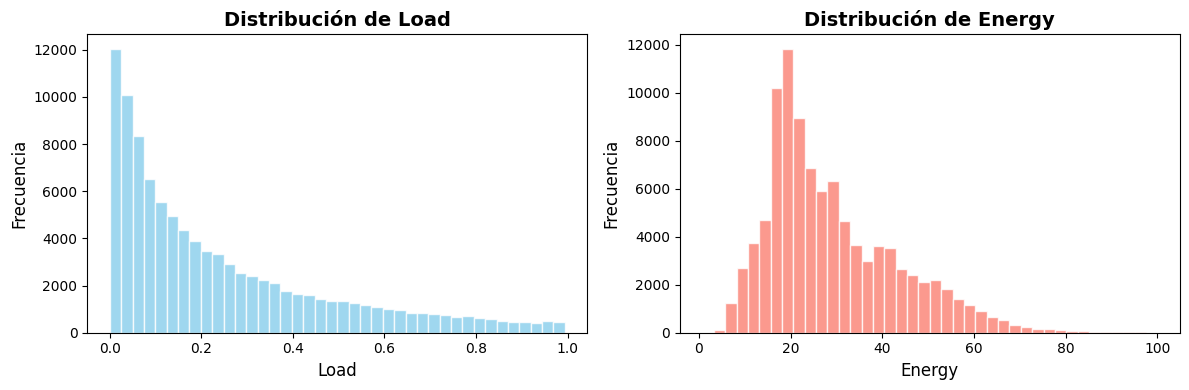

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histograma de Load
axes[0].hist(df_total['load'], bins=40, color='skyblue', edgecolor='white', alpha=0.8)
axes[0].set_title("Distribución de Load", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Load", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

# Histograma de Energy
axes[1].hist(df_total['Energy'], bins=40, color='salmon', edgecolor='white', alpha=0.8)
axes[1].set_title("Distribución de Energy", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Energy", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)

plt.tight_layout()
plt.show()

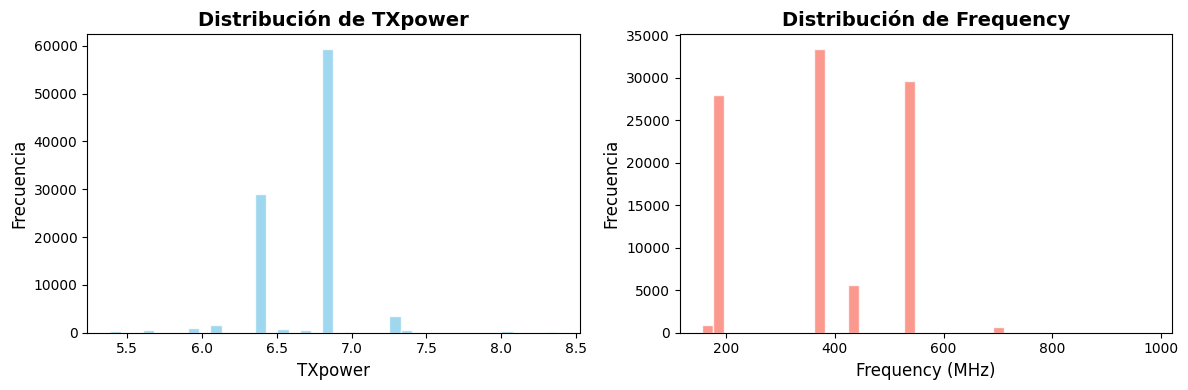

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histograma de Load
axes[0].hist(df_total['TXpower'], bins=40, color='skyblue', edgecolor='white', alpha=0.8)
axes[0].set_title("Distribución de TXpower", fontsize=14, fontweight='bold')
axes[0].set_xlabel("TXpower", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

# Histograma de Energy
axes[1].hist(df_total['Frequency'], bins=40, color='salmon', edgecolor='white', alpha=0.8)
axes[1].set_title("Distribución de Frequency", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Frequency (MHz)", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)

plt.tight_layout()
plt.show()

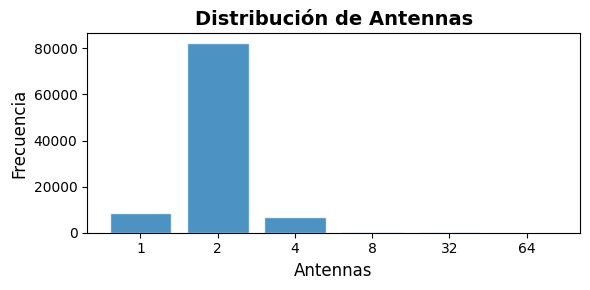

In [49]:
# Calcula conteo de cada valor de Antennas
counts = df_total['Antennas'].value_counts().sort_index()

plt.figure(figsize=(6, 3))
plt.bar(counts.index.astype(str), counts.values, edgecolor='white', alpha=0.8)
plt.title("Distribución de Antennas", fontsize=14, fontweight='bold')
plt.xlabel("Antennas", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Ajusta los ticks del eje X para que solo aparezcan los valores presentes
plt.xticks(counts.index.astype(str))

plt.tight_layout()
plt.show()

In [50]:
df_total.drop(columns=['ESMode4'],inplace=True)

KeyError: "['ESMode4'] not found in axis"

### Correlación

Energy       1.000000
load         0.594971
TXpower      0.309092
Antennas     0.165551
Bandwidth    0.160808
ESMode6      0.120975
Frequency    0.033196
ESMode3      0.013684
ESMode5     -0.004684
ESMode2     -0.267593
ESMode1     -0.269606
Name: Energy, dtype: float64


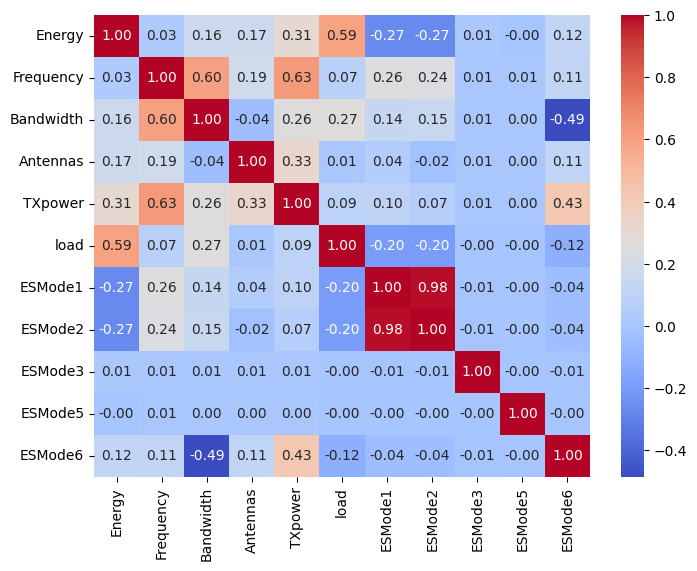

In [ ]:
corr = df_total.corr(numeric_only=True)
print(corr['Energy'].sort_values(ascending=False))  # ordenado por relación con Energy

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Relación Load y Energy

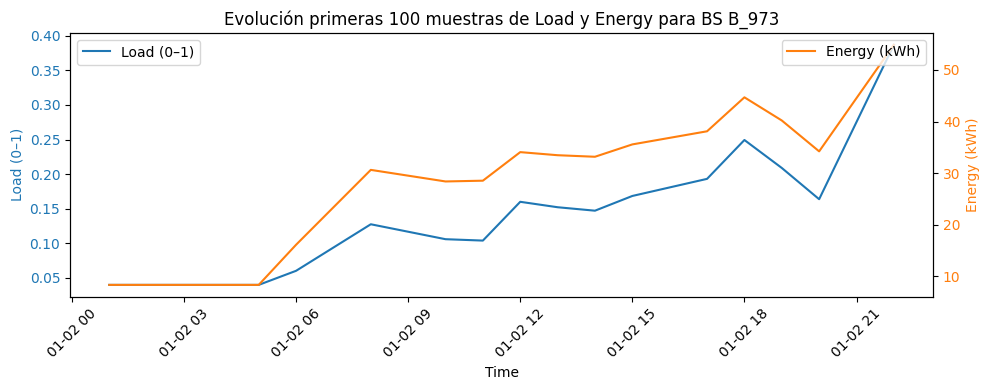

In [ ]:
import random

bs_random = random.choice(df_total["BS"].unique().tolist())
df_bs = df_total[df_total["BS"] == bs_random].copy()

# 5) Coge sólo las primeras 100 muestras cronológicas
df_plot = df_bs.iloc[:100]

# 6) Dibuja ambas series sobre el mismo Time
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(df_plot["Time"], df_plot["load"],  color="C0", label="Load (0–1)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Load (0–1)", color="C0")
ax1.tick_params(axis="y", labelcolor="C0")
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_plot["Time"], df_plot["Energy"], color="C1", label="Energy (kWh)")
ax2.set_ylabel("Energy (kWh)", color="C1")
ax2.tick_params(axis="y", labelcolor="C1")

# Leyendas
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title(f"Evolución primeras 100 muestras de Load y Energy para BS {bs_random}")
plt.tight_layout()
plt.show()

## Modelo

In [9]:
df_merge_total['hour']   = df_merge_total['Time'].dt.hour
df_merge_total['weekday']= df_merge_total['Time'].dt.weekday
df_merge_total['month']  = df_merge_total['Time'].dt.month

df_prediction_total['hour']   = df_prediction_total['Time'].dt.hour
df_prediction_total['weekday']= df_prediction_total['Time'].dt.weekday
df_prediction_total['month']  = df_prediction_total['Time'].dt.month

df_merge_total.head()

,Time,BS,Energy,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Frequency,Bandwidth,Antennas,TXpower,CellName_Cell0,CellName_Cell1,CellName_Cell2,CellName_Cell3,RUType_Type1,RUType_Type10,RUType_Type11,RUType_Type12,RUType_Type2,RUType_Type3,RUType_Type4,RUType_Type5,RUType_Type6,RUType_Type7,RUType_Type8,RUType_Type9,Mode_Mode1,Mode_Mode2,hour,weekday,month
0,2023-01-01 01:00:00,0,64.275037,0.487936,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,1,6,1
1,2023-01-01 02:00:00,0,55.904335,0.344468,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,2,6,1
2,2023-01-01 03:00:00,0,57.698057,0.193766,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,3,6,1
3,2023-01-01 04:00:00,0,55.156951,0.222383,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,4,6,1
4,2023-01-01 05:00:00,0,56.053812,0.175436,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,5,6,1


In [10]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_trainval = df_merge_total.copy()
mask_valid = df_trainval['Energy'].notnull() & np.isfinite(df_trainval['Energy'])
df_trainval = df_trainval.loc[mask_valid].reset_index(drop=True)


feature_cols = [c for c in df_trainval.columns if c not in ('Energy', 'Time')]
X = df_trainval[feature_cols]
y = df_trainval['Energy']

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_test = df_prediction_total[feature_cols]

model = XGBRegressor(
    objective='reg:gamma',
    n_estimators=2100,
    learning_rate=0.05,
    colsample_bytree=0.7,
    subsample=0.8,
    random_state=42,
    max_depth=7,
    reg_lambda=5
)
model.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=20
)

# 6) Evalúa y predice
rmse_val = mean_squared_error(y_val, model.predict(X_val))
print(f"RMSE validación: {rmse_val:.3f}")

df_prediction_total['Energy'] = model.predict(X_test)

df_prediction_total.head()

[0]	validation_0-gamma-deviance:0.21724
[20]	validation_0-gamma-deviance:0.05008
[40]	validation_0-gamma-deviance:0.02326
[60]	validation_0-gamma-deviance:0.01734
[80]	validation_0-gamma-deviance:0.01505
[100]	validation_0-gamma-deviance:0.01364
[120]	validation_0-gamma-deviance:0.01263
[140]	validation_0-gamma-deviance:0.01181
[160]	validation_0-gamma-deviance:0.01094
[180]	validation_0-gamma-deviance:0.01037
[200]	validation_0-gamma-deviance:0.00989
[220]	validation_0-gamma-deviance:0.00949
[240]	validation_0-gamma-deviance:0.00914
[260]	validation_0-gamma-deviance:0.00883
[280]	validation_0-gamma-deviance:0.00854
[300]	validation_0-gamma-deviance:0.00833
[320]	validation_0-gamma-deviance:0.00814
[340]	validation_0-gamma-deviance:0.00800
[360]	validation_0-gamma-deviance:0.00789
[380]	validation_0-gamma-deviance:0.00775
[400]	validation_0-gamma-deviance:0.00764
[420]	validation_0-gamma-deviance:0.00755
[440]	validation_0-gamma-deviance:0.00743
[460]	validation_0-gamma-deviance:0.0073

,Time,BS,Energy,w,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6,Frequency,Bandwidth,Antennas,TXpower,CellName_Cell0,CellName_Cell1,CellName_Cell2,CellName_Cell3,RUType_Type1,RUType_Type10,RUType_Type11,RUType_Type12,RUType_Type2,RUType_Type3,RUType_Type4,RUType_Type5,RUType_Type6,RUType_Type7,RUType_Type8,RUType_Type9,Mode_Mode1,Mode_Mode2,hour,weekday,month
0,2023-01-01 06:00:00,0,62.085762,1,0.189872,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,6,6,1
1,2023-01-01 11:00:00,0,74.804070,1,0.522096,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,11,6,1
2,2023-01-01 12:00:00,0,72.038223,1,0.439968,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,12,6,1
3,2023-01-01 13:00:00,0,74.830292,1,0.482723,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,13,6,1
4,2023-01-01 23:00:00,0,80.230095,1,0.782511,0.0,0.0,0.0,0,0.0,0.0,365.0,20,4,6.875934,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,23,6,1
